<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
    # start from 4 independent features:
    X = np.random.uniform(-1., 1., size=(N, 4))

    y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

    # add correlations, so that X[:,0] correlates with X[:,2] and
    # X[:,1] correlates with X[:,3]:
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

    # add some noise to the targets
    y += np.random.normal(size=y.shape)

    return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1428.94it/s]


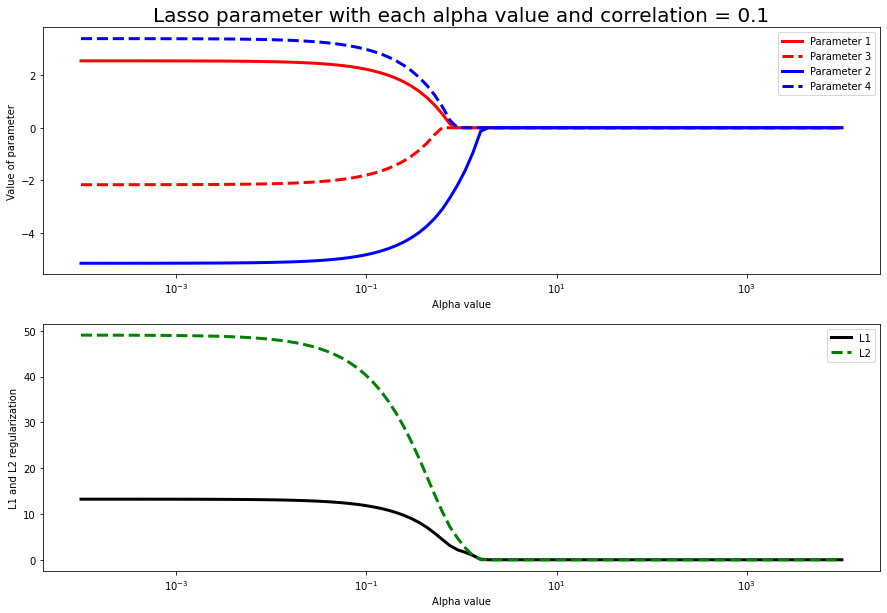

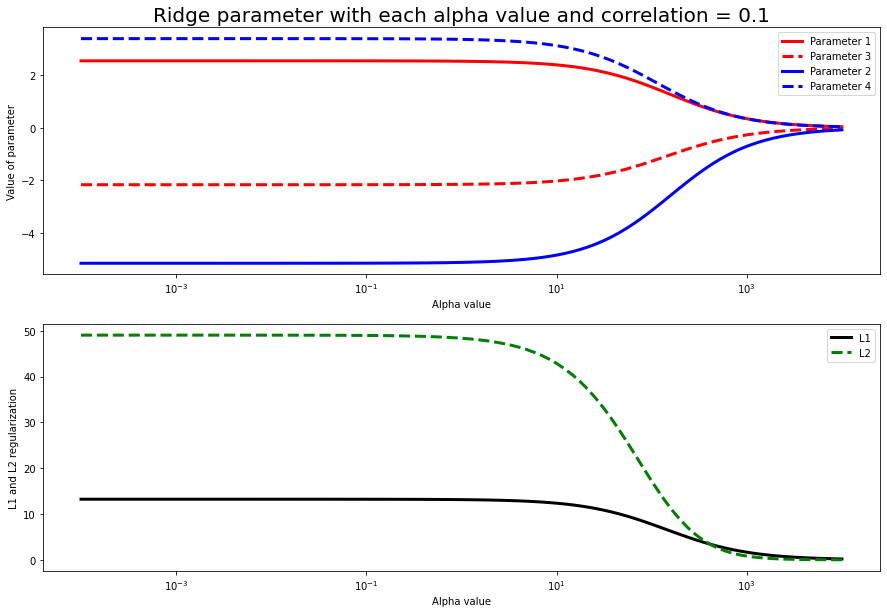

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1332.58it/s]


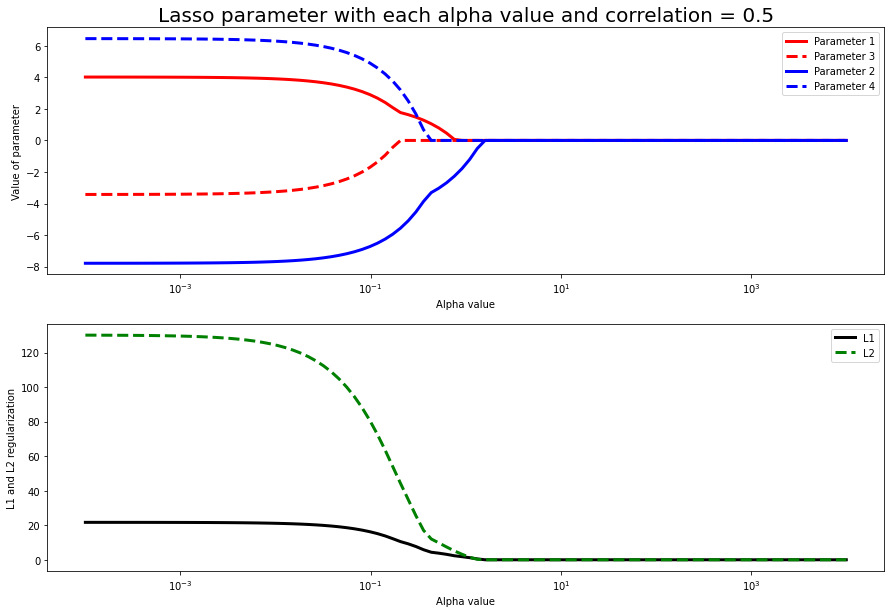

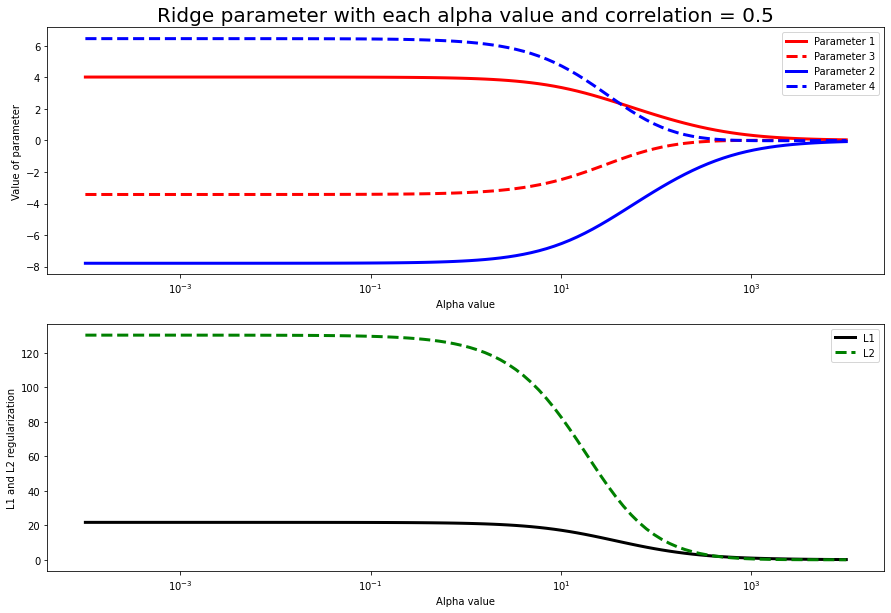

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1052.68it/s]


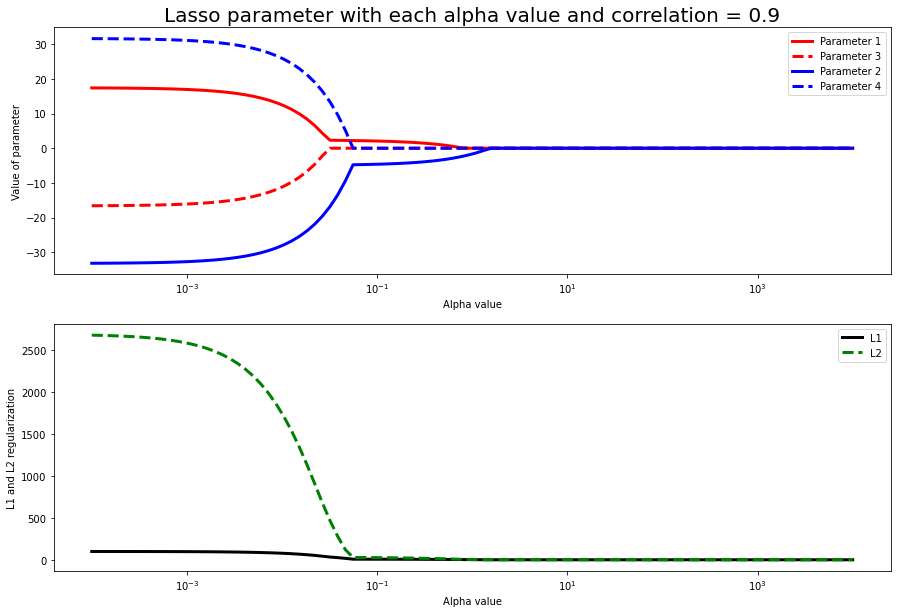

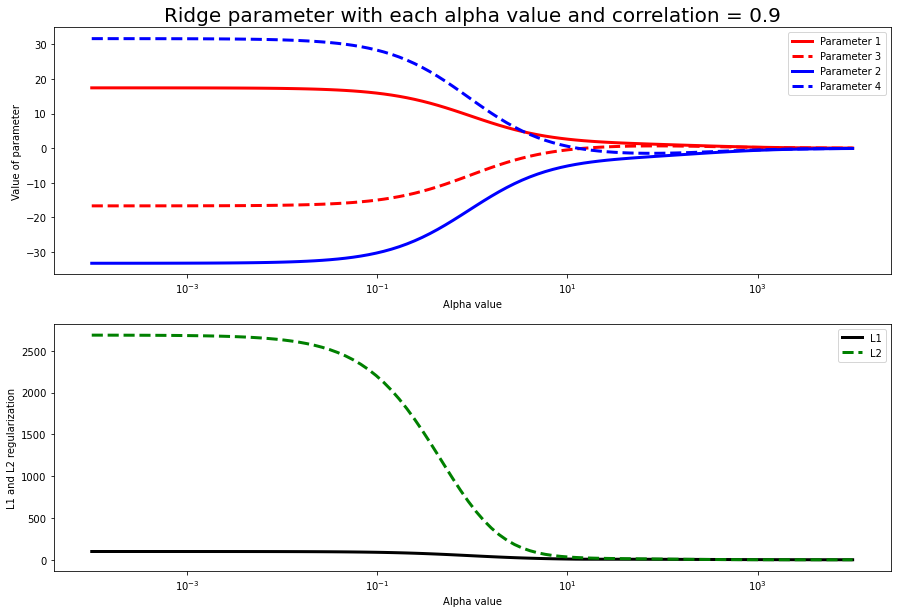

In [4]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
    # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

    # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

    # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []

    for alpha in tqdm(alpha_values):
        # setting for lasso
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, y)
        params_lasso.append(lasso.coef_)
        # seting for ridge
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, y)
        params_ridge.append(ridge.coef_)   
        
    # visualization (general)
    fig = plt.figure(figsize=(15,10))
    linewidth = 3
    
    # visualization (lasso)
    plt.subplot(211)
    plt.gca().set_xscale('log')
    plt.plot(alpha_values[:], np.array(params_lasso)[:,0], color='r', label='Parameter 1',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_lasso)[:,2], '--', color='r', label='Parameter 3',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_lasso)[:,1], color='b', label='Parameter 2',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_lasso)[:,3], '--', color='b', label='Parameter 4',linewidth=linewidth)
    plt.xlabel("Alpha value", fontsize = 10)
    plt.ylabel("Value of parameter", fontsize = 10)
    plt.title(f"Lasso parameter with each alpha value and correlation = {correlation}", fontsize = 20)
    plt.legend()
    
    # visualization (L1 and L2: lasso)
    plt.subplot(212)    
    plt.gca().set_xscale('log')
    L1 = abs(np.array(params_lasso)).sum(axis=1)
    L2 = (np.array(params_lasso)**2).sum(axis=1)
    plt.plot(alpha_values, L1, color='black', label='0',linewidth=linewidth)
    plt.plot(alpha_values, L2, '--', color='green', label='2',linewidth=linewidth)
    plt.xlabel("Alpha value", fontsize = 10)
    plt.ylabel("L1 and L2 regularization", fontsize = 10)
    plt.legend(['L1', 'L2'],fontsize='medium')
    plt.show()
    
    # visualization (ridge)
    plt.figure(figsize=(15,10))
    plt.subplot(211)    
    plt.gca().set_xscale('log')
    plt.plot(alpha_values[:], np.array(params_ridge)[:,0], color='r', label='Parameter 1',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_ridge)[:,2], '--', color='r', label='Parameter 3',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_ridge)[:,1], color='b', label='Parameter 2',linewidth=linewidth)
    plt.plot(alpha_values[:], np.array(params_ridge)[:,3], '--', color='b', label='Parameter 4',linewidth=linewidth)
    plt.xlabel("Alpha value", fontsize = 10)
    plt.ylabel("Value of parameter", fontsize = 10)
    plt.title(f"Ridge parameter with each alpha value and correlation = {correlation}", fontsize = 20)
    plt.legend()
    
    # visualization (L1 and L2)
    plt.subplot(212)    
    plt.gca().set_xscale('log')
    L1 = abs(np.array(params_ridge)).sum(axis=1)
    L2 = (np.array(params_ridge)**2).sum(axis=1)
    plt.plot(alpha_values, L1, color='black', label='L1',linewidth=linewidth)
    plt.plot(alpha_values, L2, '--', color='green', label='L2',linewidth=linewidth)
    plt.xlabel("Alpha value", fontsize = 10)
    plt.ylabel("L1 and L2 regularization", fontsize = 10)
    plt.legend()
    plt.show()

# COMMENT

In the given task we have three correlations (0.1, 0.5, 0.9) and also an alpha parameter, which varies from 10^(-4) to 10^(4). Alpha is responsible for regularization loss (L1, L2) and is set by a researcher. The bigger alpha is - the greater its impact.

L1: is used as a penalty of the sum of absolute values of the weights;

L2: is used as a penalty of the sum of squares of the weights

In all considered points, in case of L1 weights are decreasing more gradually in comparison with L2. Also, that's obvious that with the increasing of correlation coefficient, both for Lasso and Ridge parameters are converging faster.